# Heart Disease Classification Project

Author: *Eda AYDIN*

![heart_disease.png](https://indigodergisi.com/wp-content/uploads/2018/10/kalp-damar-belirti.jpg)

Heart disease accounts for about a third of all that worldwide in people over thirthy five years.

But this is a result of atherosclerosis, which consists in the narrowind of the blood pressures and ending up with war, in some cases, heart disease can completely block the inflow of oxygen rich blood to the heart muscle, causing a heart attack.

Heart disease is caused by an accumuluation of plastic deposes on the inner workings of the arteries. These deposits are cholesterol check,calcium and other substances that can travel in the blood, the product of their accumulation is called atherosclerotic fly.

This blood can block the current calombaris artery and metabolism and irregular, causing the so-called hardening of the arteries or cross causes.

The obstruction can be a single on one table and prevent previous level of gravity in different locations.

Gradually, the deposits restrict the Luman of the coronary artery, thus reducing the supply of blood and oxygen to the heart muscle distribution.

This reduction in blood flow can cause has been difficult in practice, and that's why a complete obstruction can induce a heart attack.

**AJ Roughie** is a diagnostic representation of the blood or lymphatic vessels of the human body through a technique that involves the infusion of a water soluble contrast agent within the vessels and the generation of medical imaging to biomedical imaging techniques.

---
**Project Aim:**

So in this project, we will try to predict the condition of her disease throughout a classification algorithm based on a neural network.

---
**Dataset Source:**

We will do the heart disease that is avaliable in the [UCI Machine Learning Respiratory Disease dataset](https://archive.ics.uci.edu/ml/datasets/Heart+Disease), contain several pieces of data information on the disease instances.

These are provided by the following for Clinical Shoshan Level and Clinical Foundation, Hungarian Tissue Cardiology, Long Beach Medical Center and University Hospital is Switzerland.

## DATA UNDERSTANDING

**Important parameters:**

* Number of instances: 302
* Number of attributes: 14 continuos attributes

**Each of the attributes:**
* age: Age in years
* sex: Sex(1= male, 0= female)
* cp: Chest pain type (Value 1: typical angina, Value 2: atypical angina, Value3: non-aginal pain, Value 4: asymptomatic)
* trestbps: Resting blood pressure (in mmHg on admission to the hospital)
* chol: Serum Cholestoral in mg/dl
* fbs: fast blood sugar > 120 mg/dl (1= true, 0=false)
* restecg: Resting electrocardiographic results (0: normal, 1: having ST-T wave abnormality (T wave inversions and/or St elevation or depression of > 0.05mV, 2: showing probabal or definite left ventricular hypertrophy by Estes'criteria)
* thalach: Maximum heart rate achieved
* exang: Excercise included angina (1= yes, 0=no)
* oldpeak: ST depression indced by exercise relative to rest
* slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
* ca : Number of major vessels (0-3) colored by flourosopy
* thal: 3= normal, 6= fixed defect, 7= reversable defect
* HeartDisease: Diagnosis of heart disease- angiprahic disease status  
  * Value 0: <50% diameter narrowing,
  * Value 1: > 50% diameter narrowing

in any major vessel: attributes 59 through 68 are vessels

## IMPORT LIBRARIES

In [1]:
# Data Science Tools
import pandas as pd
import numpy as np

# Data Visualization Tools
import matplotlib.pyplot as plt
import seaborn as sns

# scikit-learn library
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Keras library
import keras
from keras.models import Sequential
from keras.layers import Dense


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## GETTING DATA

In [4]:
#Import data
HDNames= ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','hal','HeartDisease']
data = pd.read_excel('/content/drive/MyDrive/ai-for-healthcare/heart-disease-classification/Ch3.ClevelandData.xlsx', names=HDNames)

In [5]:
data.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,hal,HeartDisease
0,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
1,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
2,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
3,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
4,56,1,2,120,236,0,0,178,0,0.8,1,0,3,0
5,62,0,4,140,268,0,2,160,0,3.6,3,2,3,1
6,57,0,4,120,354,0,0,163,1,0.6,1,0,3,0
7,63,1,4,130,254,0,2,147,0,1.4,2,1,7,1
8,53,1,4,140,203,1,2,155,1,3.1,3,0,7,1
9,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0


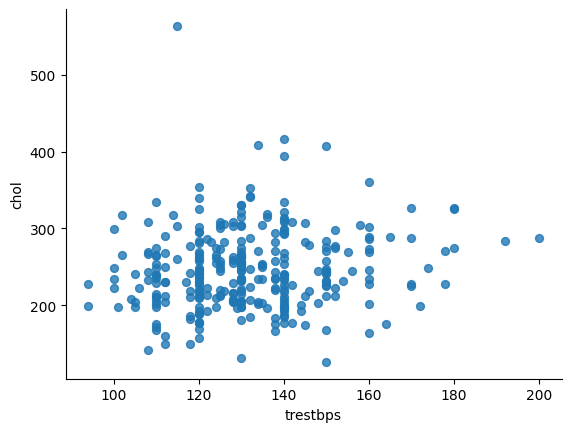

In [17]:
# @title trestbps vs chol

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='trestbps', y='chol', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

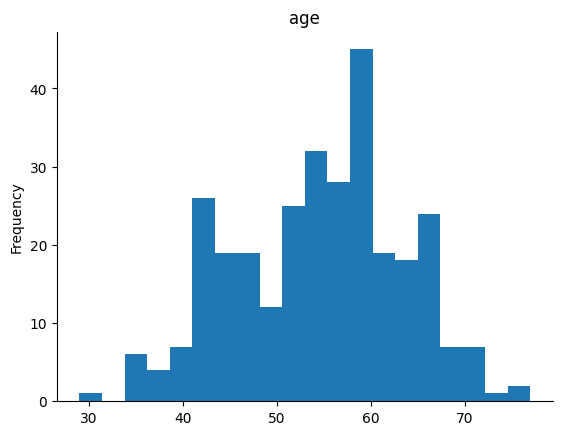

In [15]:
# @title age

from matplotlib import pyplot as plt
data['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

## EXPLORATORY DATA ANALYSIS

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           302 non-null    int64  
 1   sex           302 non-null    int64  
 2   cp            302 non-null    int64  
 3   trestbps      302 non-null    int64  
 4   chol          302 non-null    int64  
 5   fbs           302 non-null    int64  
 6   restecg       302 non-null    int64  
 7   thalach       302 non-null    int64  
 8   exang         302 non-null    int64  
 9   oldpeak       302 non-null    float64
 10  slope         302 non-null    int64  
 11  ca            302 non-null    object 
 12  hal           302 non-null    object 
 13  HeartDisease  302 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.2+ KB


In [7]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,HeartDisease
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.410596,0.678808,3.165563,131.645695,246.738411,0.145695,0.986755,149.605960,0.327815,1.035430,1.596026,0.460265
std,9.040163,0.467709,0.953612,17.612202,51.856829,0.353386,0.994916,22.912959,0.470196,1.160723,0.611939,0.499246
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000
50%,55.500000,1.000000,3.000000,130.000000,241.500000,0.000000,0.500000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


## HANDLING MISSING DATA

In [8]:
# removing missing values

data_new = data.replace("?", np.nan)

<ipython-input-8-07122dbec72a>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_new = data.replace("?", np.nan)


In [9]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           302 non-null    int64  
 1   sex           302 non-null    int64  
 2   cp            302 non-null    int64  
 3   trestbps      302 non-null    int64  
 4   chol          302 non-null    int64  
 5   fbs           302 non-null    int64  
 6   restecg       302 non-null    int64  
 7   thalach       302 non-null    int64  
 8   exang         302 non-null    int64  
 9   oldpeak       302 non-null    float64
 10  slope         302 non-null    int64  
 11  ca            298 non-null    float64
 12  hal           300 non-null    float64
 13  HeartDisease  302 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.2 KB


In [10]:
data_new.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,hal,HeartDisease
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,298.000000,300.000000,302.000000
mean,54.410596,0.678808,3.165563,131.645695,246.738411,0.145695,0.986755,149.605960,0.327815,1.035430,1.596026,0.674497,4.730000,0.460265
std,9.040163,0.467709,0.953612,17.612202,51.856829,0.353386,0.994916,22.912959,0.470196,1.160723,0.611939,0.938202,1.941563,0.499246
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,55.500000,1.000000,3.000000,130.000000,241.500000,0.000000,0.500000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


In [11]:
data_new.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


* Replace the values with constant values
* Set the values with other columns' values
* Transform the data with functions
* Delete rows

In [12]:
data_new = data_new.dropna()

In [13]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 296 entries, 0 to 300
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           296 non-null    int64  
 1   sex           296 non-null    int64  
 2   cp            296 non-null    int64  
 3   trestbps      296 non-null    int64  
 4   chol          296 non-null    int64  
 5   fbs           296 non-null    int64  
 6   restecg       296 non-null    int64  
 7   thalach       296 non-null    int64  
 8   exang         296 non-null    int64  
 9   oldpeak       296 non-null    float64
 10  slope         296 non-null    int64  
 11  ca            296 non-null    float64
 12  hal           296 non-null    float64
 13  HeartDisease  296 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 34.7 KB


In [14]:
data_new.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


## DATA SCALING

x(scaled) =(x - mean) / sd

Mean = 0
Standard Deviation = 1

* Value > mean will have +z score
* Value < mean will have -z score

In [18]:
feature_names = HDNames
feature_names.pop()

'HeartDisease'

In [19]:
features = pd.DataFrame(data_new.iloc[:, 0:13], columns = feature_names)

In [20]:
target = pd.DataFrame(data_new.iloc[:,13], columns=["HeartDisease"])

In [21]:
# I use the StandardScaler to standardize a feature by subtracting the mean and then scaling to unit variance.
scaler = StandardScaler()
print(scaler.fit(features))

StandardScaler()


In [22]:
FeatureScaled = scaler.fit_transform(features)
FeatureScaled = pd.DataFrame(FeatureScaled, columns= feature_names)

In [23]:
summary = FeatureScaled.describe()
summary = summary.transpose()

In [24]:
summary

,count,mean,std,min,25%,50%,75%,max
age,296.0,-2.550512e-16,1.001693,-2.823438,-0.720814,0.164501,0.717823,2.488454
sex,296.0,6.001206e-18,1.001693,-1.443376,-1.443376,0.692820,0.692820,0.692820
cp,296.0,1.860374e-16,1.001693,-2.263690,-0.173043,-0.173043,0.872280,0.872280
trestbps,296.0,1.920386e-16,1.001693,-2.121540,-0.656413,-0.092903,0.470607,3.851669
chol,296.0,6.601326e-17,1.001693,-2.334999,-0.700097,-0.084604,0.554931,6.089557
fbs,296.0,2.700542e-17,1.001693,-0.406638,-0.406638,-0.406638,-0.406638,2.459191
restecg,296.0,-4.800964e-17,1.001693,-1.000046,-1.000046,0.006803,1.013652,1.013652
thalach,296.0,2.160434e-16,1.001693,-3.426010,-0.723490,0.148291,0.714949,2.284154
exang,296.0,1.342770e-16,1.001693,-0.698167,-0.698167,-0.698167,1.432322,1.432322
oldpeak,296.0,6.001206e-17,1.001693,-0.903324,-0.903324,-0.215962,0.471400,4.423733


## DATA VISUALIZATION

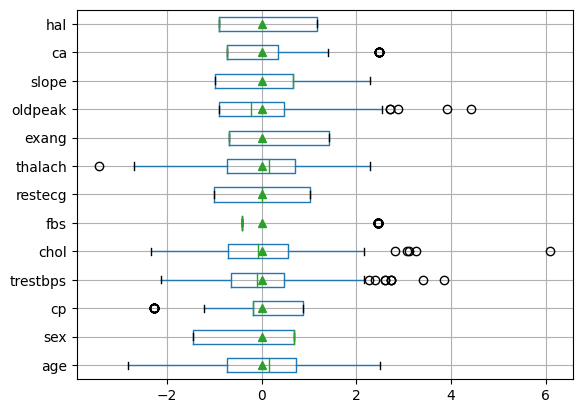

In [25]:
boxplot = FeatureScaled.boxplot(column=feature_names, showmeans=True, vert = False)
plt.show()

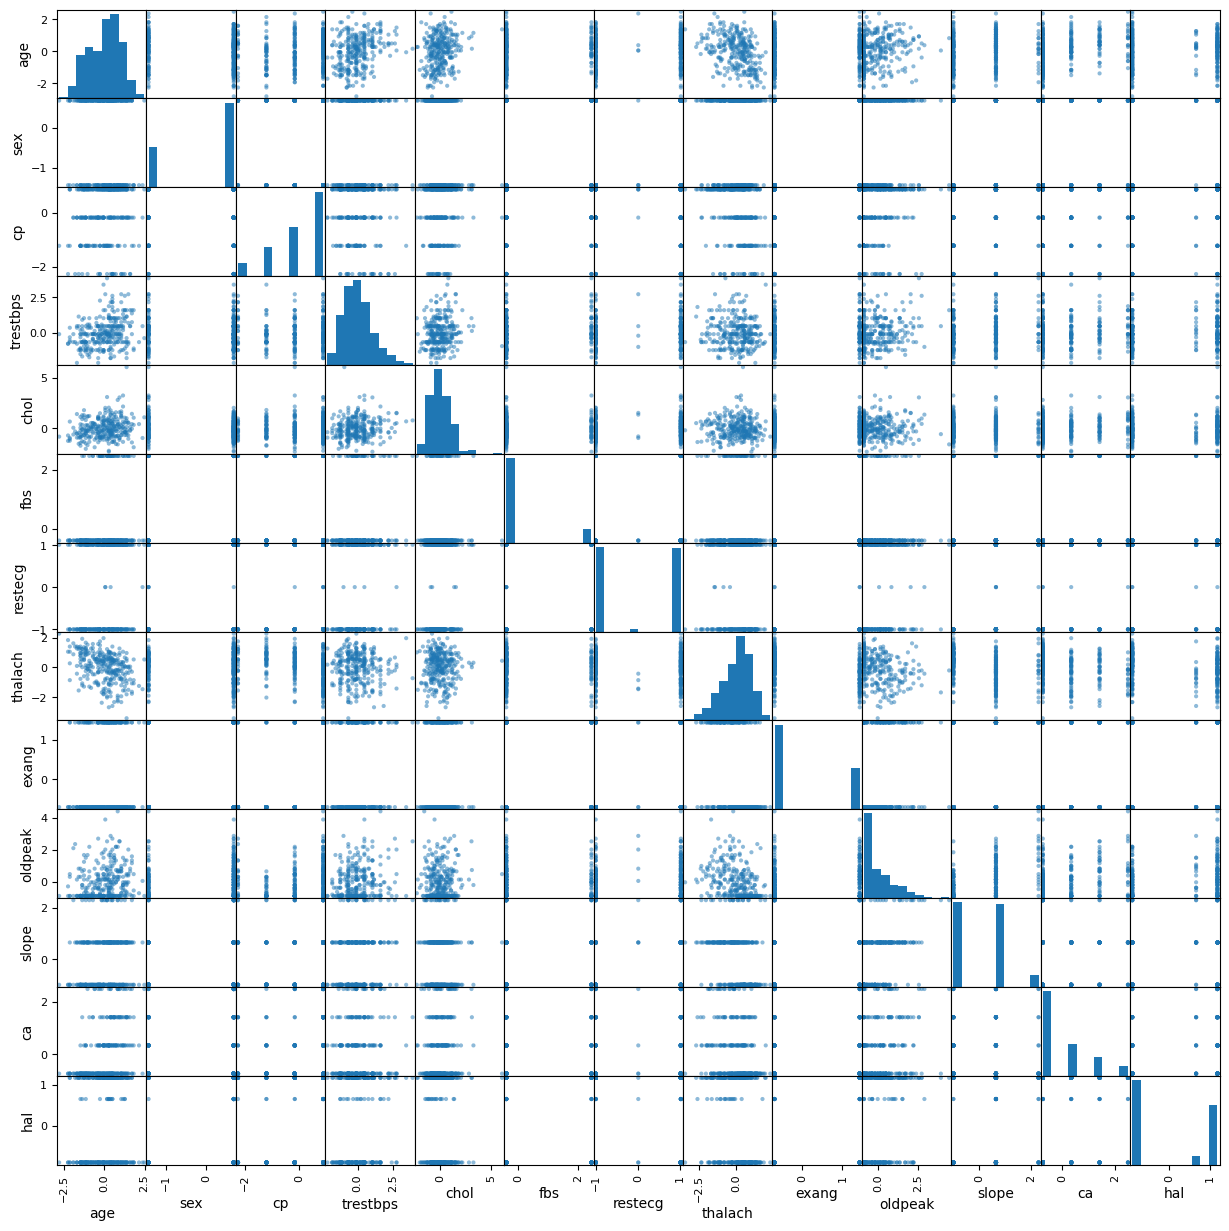

In [26]:
pd.plotting.scatter_matrix(FeatureScaled,figsize=[15,15])
plt.show()

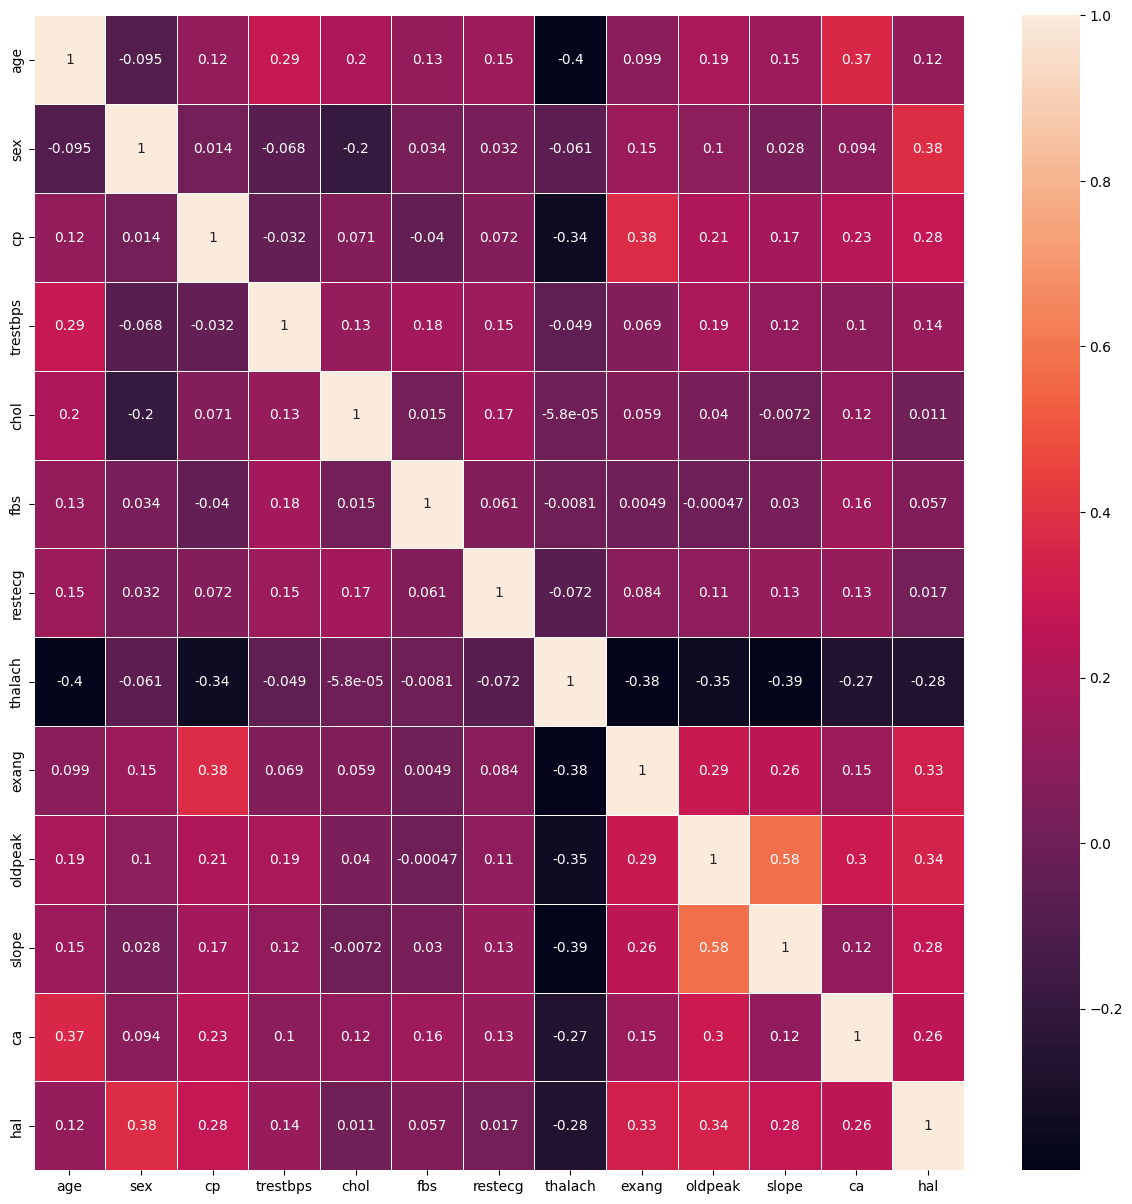

In [27]:
corrMatrix = FeatureScaled.corr()
fig, ax = plt.subplots(figsize= (15,15))
sns.heatmap(corrMatrix, annot=True, linewidths=.5, ax=ax)
plt.show()

## SPLITTING TRAINING SET INTO TEST

In [28]:
X_train, X_test, y_train, y_test = train_test_split(FeatureScaled, target, test_size=0.30, random_state=5)

# random_state parameter is used to set the seed by the random number generator

In [29]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(207, 13)
(89, 13)
(207, 1)
(89, 1)


## EVALUATING THE MODEL

* Import Sequential class from keras.models
* Stack the layers using the .add method
* Configure the learning process and using the .compile() method
* Train the model on the train dataset using the .fit() method

In [30]:
model = Sequential()
model.add(Dense(30, input_dim = 13, activation = "tanh"))
model.add(Dense(20, activation="tanh"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=1000, verbose=1)


Epoch 1/1000


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5104 - loss: 0.7550
Epoch 2/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6889 - loss: 0.6196  
Epoch 3/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7520 - loss: 0.5381 
Epoch 4/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7944 - loss: 0.5167 
Epoch 5/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8383 - loss: 0.4472 
Epoch 6/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8121 - loss: 0.4424 
Epoch 7/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8326 - loss: 0.4008 
Epoch 8/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8394 - loss: 0.3990 
Epoch 9/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8369 - loss: 0.3930 
Epoch 10/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8773 - loss: 0.3495 
Epoch 11/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8514 - loss: 0.3587 
Epoch 12/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8713 - loss

In [31]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 30)                  │             420 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 20)                  │             620 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,185 (12.45 KB)

 Trainable params: 1,061 (4.14 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,124 (8.30 KB)

In [35]:
score = model.evaluate(X_test, y_test, verbose = 0)
print("Keras Model Accuracy = ", score[1])

Keras Model Accuracy =  0.7977527976036072


In [36]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [37]:
confusion_matrix(y_test, y_pred)

array([[36,  6],
       [12, 35]])

## SUMMARY

71 observations of 89 were correctly classified by making 16 errors with an accuracy qual to 0.80.

* X_train = Array of input training data
* y_train = Array of target (label) data
* epochs = 1000: Number of epochs to train the model. An epoch is an iteration over the entire a and y data provided.
* verbose= 1: An integer, either 0,1,2.
    * 0 : silent
    * 1 : progress bar
    * 2: one line per epoch

Three arguments are passed:


*   The Adam optimizer: An algorithm for the first-order gradient-based optimization of stochastic objective functions, based on adaptive estimates of lower-order moments
*   The binary_crossentropy loss function: we will use logarithmic loss, which for a binary classification problme is defined in Keras as binary_crossentropy
*   The accuracy metric: A metric is a function that is used to evaluate the performance of your model during training and testing
